In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow, fastparquet
import s3fs
s3 = s3fs.S3FileSystem()

In [8]:
df = pd.read_parquet('s3://bdcc-final-project-bucket/war_ukr_rus_w_internal.parquet')

In [11]:
df['NumMentions'] = df['NumMentions'].astype(str).astype(int)
df['GoldSteinScale'] = df['GoldSteinScale'].astype(str).astype(float)
df['AvgTone'] = df['AvgTone'].astype(str).astype(float)
df['SQLDATE'] = pd.to_datetime(df['SQLDATE'].astype(str), format='%Y%m%d')
df['MonthYear'] = pd.to_datetime(df['MonthYear'], format='%Y%m')
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Heatmap

In [12]:
def plot_heatmap(df, filter_col, filter_val,
                 viz_col, date_col, cmap, title=None):
    """Plot a heatmap from a gdelt data frame using a filter
    from a `filter_col`.
    
    Parameters
    -----
    df1: dataframe
        Gdelt dataframe
    filter_col: dataframe column
        Column where filter will be applied.
    filter_val: dataframe column
        Filter.
    viz_col:
        Column to be visualized.
    date_col: datetime
        Column of dates in yyyyMMdd.
    vmin: int
        Minimum value for plot.
    vmax: int
        Maximum value for plot.
    cmap: string
        Color map of the chart.
    title: string
        Title of the chart.

    Output
    -----
    chart
        Heatmap!
    """
    df1 = df.loc[df[filter_col] == filter_val]
    df1 = df1[[date_col, viz_col]].set_index(date_col)
    df1['month'] = [i.month for i in df1.index]
    df1['year'] = [i.year for i in df1.index]
    df1 = df1.groupby(['month', 'year']).mean()
    df1 = df1.unstack(level=0)
    
    # plot
    ax = sns.heatmap(df1, cmap=cmap, square=True, vmax=4, vmin=-2,
                     linewidth=0.3, cbar_kws={"shrink": .8})
    # xticks
    ax.xaxis.tick_top()
    xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plt.xticks(np.arange(12) + .5, labels=xticks_labels)
    # axis labels
    plt.xlabel('')
    plt.ylabel('')
    #title
    if title == None:
        title = ('Monthly ' + viz_col + ' ' + filter_val).upper()
        plt.title(title, loc='left')
    else:
        title = title.upper()
        plt.title(title, loc='left')
    #show
    return plt.show()

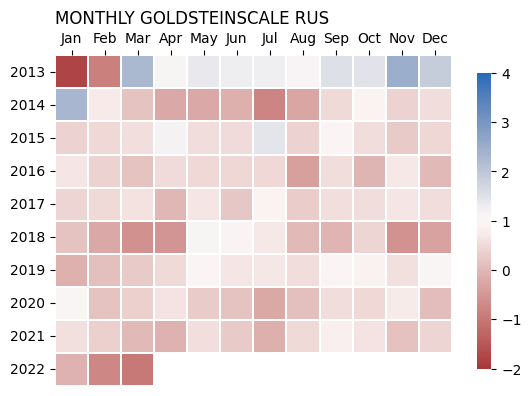

In [13]:
plot_heatmap(df, 'Actor1CountryCode', 'RUS', 'GoldSteinScale', 'SQLDATE', 'vlag_r')

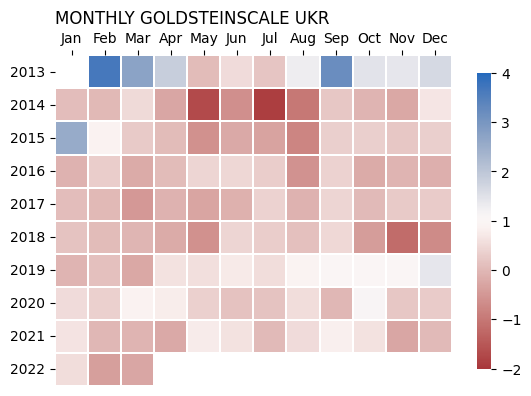

In [39]:
plot_heatmap(df, 'Actor1CountryCode', 'UKR', 'GoldSteinScale', 'SQLDATE', 'vlag_r')

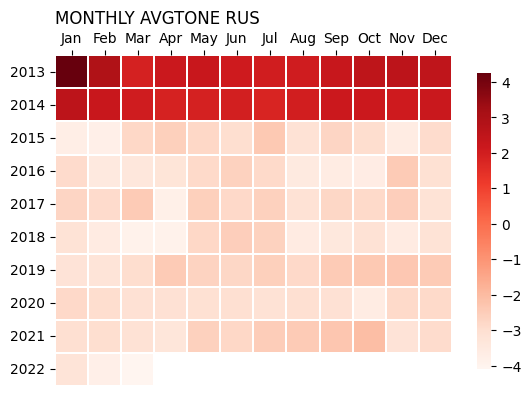

In [15]:
plot_heatmap(df, 'Actor1CountryCode', 'RUS', 'AvgTone', 'SQLDATE', 'Reds_r')

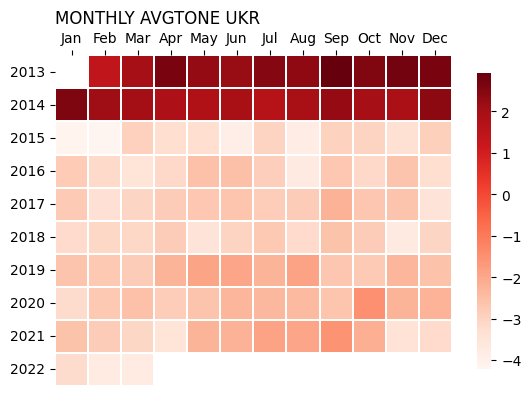

In [16]:
plot_heatmap(df, 'Actor1CountryCode', 'UKR', 'AvgTone', 'SQLDATE', 'Reds')

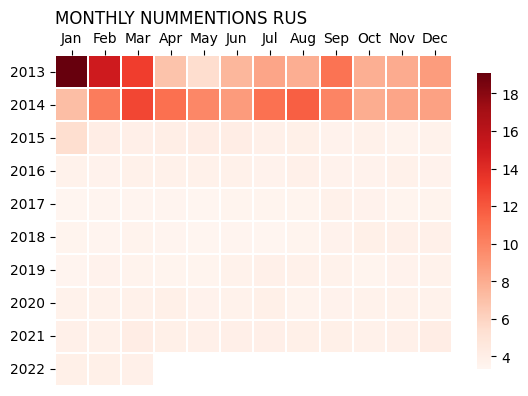

In [18]:
plot_heatmap(df, 'Actor1CountryCode', 'RUS', 'NumMentions', 'SQLDATE', 'Reds')

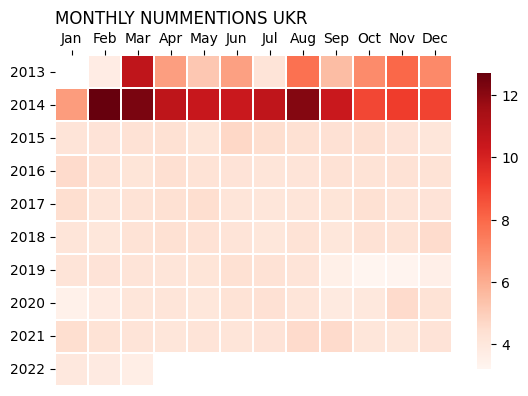

In [19]:
plot_heatmap(df, 'Actor1CountryCode', 'UKR', 'NumMentions', 'SQLDATE', 'Reds')

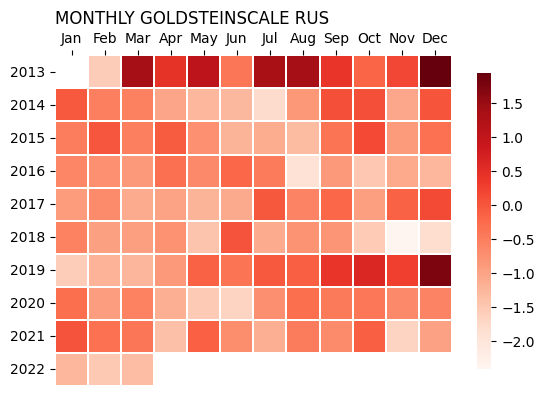

In [9]:
df_rus_ukr = df.loc[((df['Actor1CountryCode'] == 'RUS') & (df['Actor2CountryCode'] == 'UKR'))]
plot_heatmap(df_rus_ukr, 'Actor1CountryCode', 'RUS', 'GoldSteinScale', 'SQLDATE', 'Reds')